In [1]:
#Carga delibrerias con dataset de iris
from sklearn.datasets import load_iris
#Carga libreria de clasificacion 
from sklearn.ensemble import RandomForestClassifier
#Carga libreria panda
import pandas as pd
#carga libreria numpy
import numpy as np
#Establece la semilla aleatoria
np.random.seed(0)

In [2]:
#Crea un objeto llamdo iris con la informacion de iris
iris = load_iris()
#como son los datos
#print(iris)
#Crea un cuadro de datos con cuatro variables
df = pd.DataFrame(iris.data, columns =  iris.feature_names)
#Muestra datos 
print(df.head())
#Jupiter presenta datos de esta manera
df.head()

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris.data.shape

(150, 4)

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
from sklearn.model_selection import train_test_split
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [9]:
 X_entrena.shape, X_prueba.shape

((120, 4), (30, 4))

In [10]:
 y_entrena.shape, y_prueba.shape

((120,), (30,))

In [11]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()

In [12]:
dtc.fit(X_entrena, y_entrena)
dtc

DecisionTreeClassifier()

In [13]:
dtc.score(X_entrena, y_entrena)

1.0

In [14]:
dtc.score(X_prueba, y_prueba)

1.0

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(3,3))
    sns.heatmap(conf_matrix, xticklabels=iris.target_names, yticklabels=iris.target_names, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

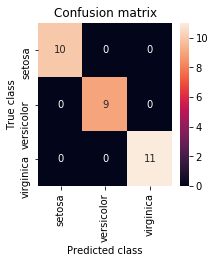

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
y_pred = dtc.predict(X_prueba)
mostrar_resultados(y_prueba, y_pred)

In [19]:
# Puntaje por defecto es la exactitud
dtc.score(X_prueba, y_prueba)

1.0

In [23]:
from sklearn.metrics import roc_auc_score
prediction_prob = dtc.predict_proba(X_prueba)
pos_prob = prediction_prob[:, 1]


import numpy as np
pos_prob = prediction_prob[:, 1]
thresholds = np.arange(0.0, 1.2, 0.1)
true_pos, false_pos = [0]*len(thresholds), [0]*len(thresholds)
for pred, y in zip(pos_prob, y_prueba):
    for i, threshold in enumerate(thresholds):
        if pred >= threshold:
            # si real y predicion son 1
            if y == 1:
                true_pos[i] += 1
                # si real es 0 mientras que la prediccion es 1
            else:
                false_pos[i] += 1
        else:
            break

In [24]:
true_pos_rate = [tp / 71.0 for tp in true_pos]
false_pos_rate = [fp / 43.0 for fp in false_pos]

No handles with labels found to put in legend.


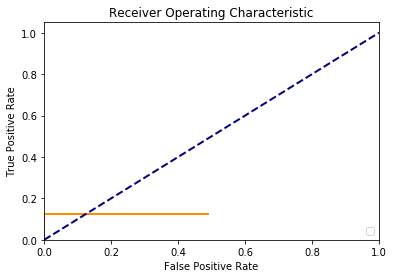

In [25]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(false_pos_rate, true_pos_rate, color='darkorange', lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [26]:
import numpy as np
max_depths = np.array([1, 2, 3, 5, 7, 9, 11])

In [29]:
train_score = []
test_score = []
for d in max_depths:
    dtc = tree.DecisionTreeClassifier(max_depth=d, random_state=42)
    dtc.fit(X_entrena, y_entrena)
    train_score.append(dtc.score(X_entrena, y_entrena))
    test_score.append(dtc.score(X_prueba, y_prueba))

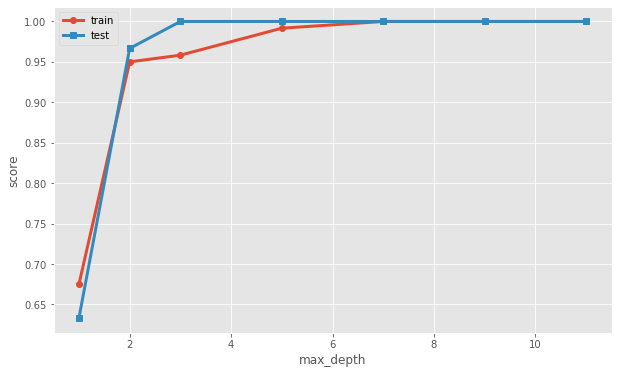

In [30]:
# import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_score, 'o-', linewidth=3, label='train')
plt.plot(max_depths, test_score, 's-', linewidth=3, label='test')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend()

In [32]:
train_score = []
test_score = []
min_samples = np.array([2, 4, 8, 16, 32])
for s in min_samples:
    dtc = tree.DecisionTreeClassifier(min_samples_leaf=s, random_state=42)
    dtc.fit(X_entrena, y_entrena)
    train_score.append(dtc.score(X_entrena, y_entrena))
    test_score.append(dtc.score(X_prueba, y_prueba))

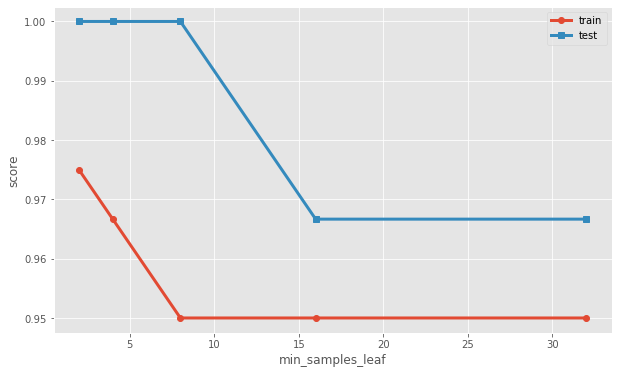

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(min_samples, train_score, 'o-', linewidth=3, label='train')
plt.plot(min_samples, test_score, 's-', linewidth=3,label='test')
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.legend()